# Pandas - Teil 2

Im ersten Teil haben wir gesehen, wie wir eine `.csv`-Datei einlesen und grundlegende Eigenschaften erkunden. Hier werden wir jetzt noch einige Schritte weitergehen im Umgang mit (komplexen) Datensets.

## Data cleaning

Unter data cleaning versteht man das Umstellen und Bearbeiten von Daten mit dem Ziel, diese für die folgende Analyse besser nutzbar zu machen. Einen Schritt in diese Richtung haben wir letztes Mal bereits unternommen, indem wir die Anzahl der Spalten auf die wichtigsten reduziert haben.

In [1]:
import pandas as pd
import numpy as np
import os

root = os.getcwd()
filename = os.path.join(root, "../data", 'pokemon.csv')

data = pd.read_csv(filename, delimiter=",")

cols = [
    'name', 'type1', 'type2', 'speed', 'abilities','attack',
    'defense', 'height_m', 'hp', 'weight_kg',
    'generation', 'is_legendary'
]

data_selected = data[cols]

Mit `data_selected.info()` können wir sehen, das einige Spalten nicht die benötigten 801 Einträge enthalten.

In [2]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          801 non-null    object 
 1   type1         801 non-null    object 
 2   type2         417 non-null    object 
 3   speed         801 non-null    int64  
 4   abilities     801 non-null    object 
 5   attack        801 non-null    int64  
 6   defense       801 non-null    int64  
 7   height_m      781 non-null    float64
 8   hp            801 non-null    int64  
 9   weight_kg     781 non-null    float64
 10  generation    801 non-null    int64  
 11  is_legendary  801 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.2+ KB


Wenn wir uns die Tabelle anschauen (z.B. mit `data_selected.head()`) , sehen wir, dass einige Einträge `NaN` heißen. Dies steht für Not-a-Number und ist das Numpy Format für fehlende/unbekannte Einträge. 

In [3]:
data_selected.head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,45,"['Overgrow', 'Chlorophyll']",49,49,0.7,45,6.9,1,0
1,Ivysaur,grass,poison,60,"['Overgrow', 'Chlorophyll']",62,63,1.0,60,13.0,1,0
2,Venusaur,grass,poison,80,"['Overgrow', 'Chlorophyll']",100,123,2.0,80,100.0,1,0
3,Charmander,fire,NaN,65,"['Blaze', 'Solar Power']",52,43,0.6,39,8.5,1,0
4,Charmeleon,fire,NaN,80,"['Blaze', 'Solar Power']",64,58,1.1,58,19.0,1,0



Pandas bietet eine Reihe von Möglichkeiten mit solchen fehlenden Werten  umzugehen. NaN's gibt es auch in Numpy, nur haben wir sie uns dort nicht explizit  angeschaut. In Numpy kann solch ein Eintrag erstellt werden als `np.nan`.

In Pandas können diese über `.isnull()` oder `isna()` abgefragt werden, wobei das `.any()` angibt das der Wert True ausgegeben werden soll wenn mindestens ein Element ein NaN ist. Beide Methoden machen hier das Gleiche auch wenn "isnull" vielleicht verwirrend ist, denn es gibt nicht wieder ob ein Wert Null ist, sondern nur ob ein Wert nicht vorhanden ist (NaN --> True).

In [5]:
data_selected.isna().any()

name            False
type1           False
type2            True
speed           False
abilities       False
attack          False
defense         False
height_m         True
hp              False
weight_kg        True
generation      False
is_legendary    False
dtype: bool

In [6]:
data_selected.isnull().any()

name            False
type1           False
type2            True
speed           False
abilities       False
attack          False
defense         False
height_m         True
hp              False
weight_kg        True
generation      False
is_legendary    False
dtype: bool

Wir können nun alle Spalten anzeigen in denen einzelne Werte fehlen:

In [10]:
columns_with_nan = data_selected.columns[data_selected.isna().any()]
data_selected[columns_with_nan]

,type2,height_m,weight_kg
0,poison,0.7,6.9
1,poison,1.0,13.0
2,poison,2.0,100.0
3,NaN,0.6,8.5
4,NaN,1.1,19.0
...,...,...,...
796,flying,9.2,999.9
797,steel,0.3,0.1
798,dragon,5.5,888.0
799,NaN,2.4,230.0


### Und jetzt? Was tun mit NaNs?

Je nachdem was wir mit den Daten vorhaben, gibt es verschiedene Strategien mit den fehlenden Einträgen umzugehen. In vielen Fällen können wir sie einfach ignorieren. Wenn wir Mittelwerte (`.mean()`) oder Ähnliches berechnen, werde diese Werte automatisch nicht mitgezählt.

In anderen Fällen wollen wir die Werte vielleicht ersetzten, z.B. durch "0". Aber Vorsicht! Danach werden diese Werte nämlich doch mitgezählt wenn Summen oder Mittelwerte berechnet werden.

#### NaN ersetzen

Das Ersetzen geht bei Pandas mit `.fillna()`:

In [11]:
data_selected.fillna(0).head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,45,"['Overgrow', 'Chlorophyll']",49,49,0.7,45,6.9,1,0
1,Ivysaur,grass,poison,60,"['Overgrow', 'Chlorophyll']",62,63,1.0,60,13.0,1,0
2,Venusaur,grass,poison,80,"['Overgrow', 'Chlorophyll']",100,123,2.0,80,100.0,1,0
3,Charmander,fire,0,65,"['Blaze', 'Solar Power']",52,43,0.6,39,8.5,1,0
4,Charmeleon,fire,0,80,"['Blaze', 'Solar Power']",64,58,1.1,58,19.0,1,0


Wir können aber auch Strings oder andere Formate benutzen:

In [12]:
data_selected.fillna("unknown").head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,45,"['Overgrow', 'Chlorophyll']",49,49,0.7,45,6.9,1,0
1,Ivysaur,grass,poison,60,"['Overgrow', 'Chlorophyll']",62,63,1.0,60,13.0,1,0
2,Venusaur,grass,poison,80,"['Overgrow', 'Chlorophyll']",100,123,2.0,80,100.0,1,0
3,Charmander,fire,unknown,65,"['Blaze', 'Solar Power']",52,43,0.6,39,8.5,1,0
4,Charmeleon,fire,unknown,80,"['Blaze', 'Solar Power']",64,58,1.1,58,19.0,1,0


Das kann sinnvoll sein, wenn wir die "unknown" explizit mitzählen möchten:

In [15]:
data_selected.fillna("unknown")["type2"].value_counts()

type2
unknown     384
flying       95
poison       34
ground       34
psychic      29
fairy        29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
rock         14
ghost        14
fire         13
electric      9
bug           5
normal        4
Name: count, dtype: int64

### NaN entfernen

Falls NaN nicht einfach ersetzt werden können und für die weiteren Schritte nicht vorkommen sollen, dann müssen entweder die entsprechenden Spalten oder Zeilen aus der Tabelle entfernt werden. Das geht in Pandas mit `.dropna()`.

In [16]:
data_selected.dropna().head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,45,"['Overgrow', 'Chlorophyll']",49,49,0.7,45,6.9,1,0
1,Ivysaur,grass,poison,60,"['Overgrow', 'Chlorophyll']",62,63,1.0,60,13.0,1,0
2,Venusaur,grass,poison,80,"['Overgrow', 'Chlorophyll']",100,123,2.0,80,100.0,1,0
5,Charizard,fire,flying,100,"['Blaze', 'Solar Power']",104,78,1.7,78,90.5,1,0
11,Butterfree,bug,flying,70,"['Compoundeyes', 'Tinted Lens']",45,50,1.1,60,32.0,1,0


Oder für die Entfernung aller Spalten mit NaNs:

In [17]:
data_selected.dropna(axis=1).head()

,name,type1,speed,abilities,attack,defense,hp,generation,is_legendary
0,Bulbasaur,grass,45,"['Overgrow', 'Chlorophyll']",49,49,45,1,0
1,Ivysaur,grass,60,"['Overgrow', 'Chlorophyll']",62,63,60,1,0
2,Venusaur,grass,80,"['Overgrow', 'Chlorophyll']",100,123,80,1,0
3,Charmander,fire,65,"['Blaze', 'Solar Power']",52,43,39,1,0
4,Charmeleon,fire,80,"['Blaze', 'Solar Power']",64,58,58,1,0


### Wichtig:

In Python gibt es zwei Möglichkeiten für Methoden die "ihr" Objekt verändern wollen:

1) Objekt bleibt unverändert und veränderte Kopie wird über `return` ausgegeben.
2) Objekt selbst wird verändert.

Bei Pandas findet in der Regel (1) statt, siehe auch https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-view-versus-copy.

Das bedeutet, wenn wir ein verändertes DataFrame erhalten wollen müssen wir dies mit `=` erstellen:


In [18]:
data_na_removed = data_selected.dropna()
data_na_removed.head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
0,Bulbasaur,grass,poison,45,"['Overgrow', 'Chlorophyll']",49,49,0.7,45,6.9,1,0
1,Ivysaur,grass,poison,60,"['Overgrow', 'Chlorophyll']",62,63,1.0,60,13.0,1,0
2,Venusaur,grass,poison,80,"['Overgrow', 'Chlorophyll']",100,123,2.0,80,100.0,1,0
5,Charizard,fire,flying,100,"['Blaze', 'Solar Power']",104,78,1.7,78,90.5,1,0
11,Butterfree,bug,flying,70,"['Compoundeyes', 'Tinted Lens']",45,50,1.1,60,32.0,1,0


## Data selection

Gehen wir mit der Analyse der Daten einen Schritt weiter. Was, wenn wir mehr über einzelne Gruppen wissen möchten? Oder über Einträge die bestimmte Bedingungen erfüllen?

### Option 1: Masken

Über Masken können wir ganz gezielt einzelne Fragen adressieren:

In [19]:
mask = data_selected["type1"] == "bug"
data_selected[mask].head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
9,Caterpie,bug,NaN,45,"['Shield Dust', 'Run Away']",30,35,0.3,45,2.9,1,0
10,Metapod,bug,NaN,30,['Shed Skin'],20,55,0.7,50,9.9,1,0
11,Butterfree,bug,flying,70,"['Compoundeyes', 'Tinted Lens']",45,50,1.1,60,32.0,1,0
12,Weedle,bug,poison,50,"['Shield Dust', 'Run Away']",35,30,0.3,40,3.2,1,0
13,Kakuna,bug,poison,35,['Shed Skin'],25,50,0.6,45,10.0,1,0


Über solche Masken können wir auch Eigenschaften über einzelne Gruppen abfragen:

In [20]:
data_selected[mask]["weight_kg"].mean()

33.083333333333336

### Option 2: query

Pandas bietet auch die Möglichkeit statt mit einer Maske direkt mit der Methode `.query` zu arbeiten.
Das sieht eventuell etwas netter aus, bietet aber ansonsten keine Vorteile zu den Masken.

Da Masken sowohl bei Numpy wie auch bei Pandas gehen, bleiben wir im Folgenden bei den Masken.

In [40]:
data_selected.query("type1 == 'bug'").head()

,name,type1,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
9,Caterpie,bug,NaN,45,"['Shield Dust', 'Run Away']",30,35,0.3,45,2.9,1,0
10,Metapod,bug,NaN,30,['Shed Skin'],20,55,0.7,50,9.9,1,0
11,Butterfree,bug,flying,70,"['Compoundeyes', 'Tinted Lens']",45,50,1.1,60,32.0,1,0
12,Weedle,bug,poison,50,"['Shield Dust', 'Run Away']",35,30,0.3,40,3.2,1,0
13,Kakuna,bug,poison,35,['Shed Skin'],25,50,0.6,45,10.0,1,0


### Outlook: groupby

Für analysen von bestimmten Untergruppen bietet Pandas noch eine Funktion die das noch einfacher macht als mit Masken oder query zu arbeiten: `groupby()`.

## Groupby

Pandas `grouby` (siehe [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)).

Mit grouby können bei Pandas alle Einträge mit bestimmten Kategorien zusammengefasst werden. Damit lassen sich leicht und schnell viele Eigenschaften vergleichen.


In [31]:
data_selected.groupby("type1").mean(numeric_only=True)

,speed,attack,defense,height_m,hp,weight_kg,generation,is_legendary
type1,,,,,,,,
bug,63.569444,70.125000,70.847222,0.883333,56.722222,33.083333,3.763889,0.041667
dark,75.310345,87.793103,70.517241,1.296552,72.551724,69.096552,4.275862,0.103448
dragon,76.111111,106.407407,86.259259,1.937037,79.851852,107.125926,4.296296,0.259259
electric,85.410256,70.820513,61.820513,0.981579,60.512821,37.944737,3.461538,0.128205
fairy,53.666667,62.111111,68.166667,0.794444,73.944444,23.555556,4.277778,0.055556
fighting,64.285714,99.178571,66.392857,1.196429,71.428571,58.675000,3.750000,0.000000
fire,73.346154,81.500000,67.788462,1.168000,68.730769,66.096000,3.634615,0.096154
flying,99.666667,66.666667,65.000000,1.166667,68.000000,52.000000,5.666667,0.333333
ghost,58.333333,72.740741,79.518519,1.251852,63.370370,69.570370,4.370370,0.037037


Hier sind die Einträge nach dem "type1" alphabetisch sortiert. Um die Sortierung zu ändern fügen wir einfach ein `sort_values()`hinzu um nach der gewünschten Spalte zu sortieren:

In [34]:
data_selected.groupby("type1").mean(numeric_only=True).sort_values("speed")

,speed,attack,defense,height_m,hp,weight_kg,generation,is_legendary
type1,,,,,,,,
fairy,53.666667,62.111111,68.166667,0.794444,73.944444,23.555556,4.277778,0.055556
steel,56.583333,93.083333,120.208333,1.875000,66.791667,188.841667,4.208333,0.250000
rock,57.422222,90.666667,96.266667,1.304878,66.333333,92.946341,3.800000,0.088889
ghost,58.333333,72.740741,79.518519,1.251852,63.370370,69.570370,4.370370,0.037037
grass,59.025641,73.769231,70.871795,0.938961,65.358974,33.255844,3.935897,0.051282
ground,59.968750,94.812500,83.906250,1.340741,73.187500,150.044444,3.343750,0.062500
ice,62.739130,73.304348,71.913043,1.208696,72.086957,103.260870,3.565217,0.086957
bug,63.569444,70.125000,70.847222,0.883333,56.722222,33.083333,3.763889,0.041667
water,63.921053,73.307018,73.482456,1.283333,70.219298,51.071930,3.210526,0.052632


Groupby kann auch genutzt werden um die Anzahl der Elemente in den jeweiligen Gruppen zu zählen:

In [35]:
data_selected.groupby("type1").count()

,name,type2,speed,abilities,attack,defense,height_m,hp,weight_kg,generation,is_legendary
type1,,,,,,,,,,,
bug,72,54,72,72,72,72,72,72,72,72,72
dark,29,20,29,29,29,29,29,29,29,29,29
dragon,27,15,27,27,27,27,27,27,27,27,27
electric,39,13,39,39,39,39,38,39,38,39,39
fairy,18,2,18,18,18,18,18,18,18,18,18
fighting,28,6,28,28,28,28,28,28,28,28,28
fire,52,25,52,52,52,52,50,52,50,52,52
flying,3,2,3,3,3,3,3,3,3,3,3
ghost,27,18,27,27,27,27,27,27,27,27,27


Es ist sogar möglich, mehrere groupby Aktionen zu kombinieren und damit Gruppen und Untergruppen zu erstellen:

In [37]:
data_selected.groupby(["type1", "is_legendary"]).mean(numeric_only=True)

speed      attack     defense  height_m  \
type1    is_legendary                                                 
bug      0              61.565217   67.434783   70.000000  0.839130   
         1             109.666667  132.000000   90.333333  1.900000   
dark     0              73.730769   85.538462   69.500000  0.953846   
         1              89.000000  107.333333   79.333333  4.266667   
dragon   0              68.000000   98.650000   78.900000  1.390000   
         1              99.285714  128.571429  107.285714  3.500000   
electric 0              82.411765   67.000000   59.558824  0.809091   
         1             105.800000   96.800000   77.200000  2.120000   
fairy    0              51.000000   58.058824   66.588235  0.664706   
         1              99.000000  131.000000   95.000000  3.000000   
fighting 0              64.285714   99.178571   66.392857  1.196429   
fire     0              72.063830   78.574468   64.553191  1.046667   
         1              85.400000  109.000000   98.200000  2.260000   
flying   0              89.000000   50.000000   57.500000  1.000000   
         1             121.000000  100.000000   80.000000  1.500000   
ghost    0              57.115385   70.923077   78.730769  1.126923   
         1              90.000000  120.000000  100.000000  4.500000   
grass    0              56.554054   70.945946   69.391892  0.930137   
         1             104.750000  126.000000   98.250000  1.100000   
ground   0              57.933333   90.300000   81.166667  1.248000   
         1              90.500000  162.500000  125.000000  2.500000   
ice      0              62.285714   73.857143   69.238095  1.157143   
         1              67.500000   67.500000  100.000000  1.750000   
normal   0              68.166667   73.372549   58.313725  0.979592   
         1             116.000000  136.000000  106.666667  2.500000   
poison   0              64.187500   72.656250   70.031250  1.160000   
psychic  0              65.444444   50.138889   57.277778  0.869444   
         1              95.705882   98.235294   94.647059  1.500000   
rock     0              53.975610   88.731707   94.756098  1.297297   
         1              92.750000  110.500000  111.750000  1.375000   
steel    0              49.111111   91.833333  120.444444  1.394444   
         1              79.000000   96.833333  119.500000  3.316667   
water    0              62.212963   71.898148   71.916667  1.227778   
         1              94.666667   98.666667  101.666667  2.283333   

                               hp   weight_kg  generation  
type1    is_legendary                                      
bug      0              55.579710   28.128986    3.652174  
         1              83.000000  147.033333    6.333333  
dark     0              64.807692   33.165385    4.115385  
         1             139.666667  380.500000    5.666667  
dragon   0              67.500000   65.065000    4.300000  
         1             115.142857  227.300000    4.285714  
electric 0              57.294118   31.206061    3.323529  
         1              82.400000   82.420000    4.400000  
fairy    0              70.882353   12.294118    4.176471  
         1             126.000000  215.000000    6.000000  
fighting 0              71.428571   58.675000    3.750000  
fire     0              65.787234   49.395556    3.702128  
         1              96.400000  216.400000    3.000000  
flying   0              62.500000   46.500000    6.000000  
         1              79.000000   63.000000    5.000000  
ghost    0              60.038462   43.400000    4.384615  
         1             150.000000  750.000000    4.000000  
grass    0              64.567568   31.684932    3.837838  
         1              80.000000   61.925000    5.750000  
ground   0              71.766667  121.328000    3.300000  
         1              94.500000  509.000000    4.000000  
ice      0              70.857143  102.123810    3.714286  
         1              85.0000


Damit können wir einsehen, welche mittleren Werte ein Pokemon von einem bestimmtem Typ hat, je nachdem ob er "legendary" ist oder nicht.

## Plotting

Noch einige kurze Plotting-Beispiele zum Schluss.

Da wir eben `groupby` benutzt haben, können wir dies auch verwenden um einen Plot zu erzeugen. "stacked=True" bedeutet hierbei übrigens, dass die verschiedenen Balken aneinander gehängt werden sollen.

<Axes: ylabel='type1'>

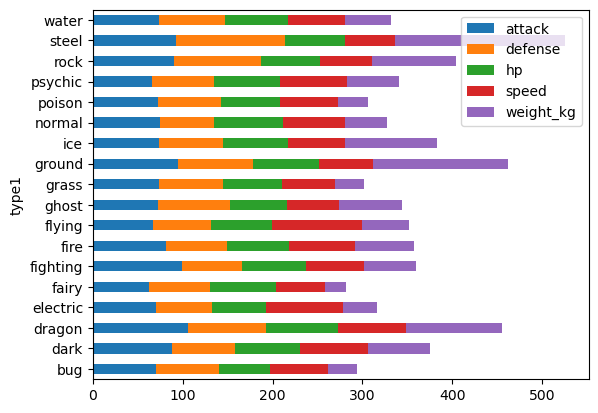

In [38]:
cols = ["attack", "defense", "hp", "speed", "weight_kg"]
data_selected.groupby("type1").mean(numeric_only=True)[cols].plot.barh(stacked=True)

Es gibt schönere Plots, aber zumindest sehen wir so sehr schnell, dass vor allem der Eintrag "weight_kg" sehr stark von der jeweiligen type1-Gruppe abhängt! Also gleich noch einen Plot dafür hinterher:

<Axes: ylabel='type1'>

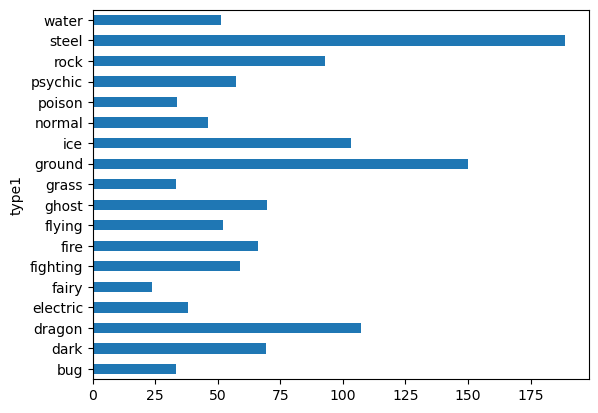

In [41]:
data_selected.groupby("type1").mean(numeric_only=True)["weight_kg"].plot.barh()

### Intermezzo: data visualization

Warum ist der Plot hier oben ziemlich mies?

--> Die Reihenfolge macht es **sehr** unübersichtlich! Stellen Sie sich vor ich frage, welcher Typ auf der Position 3, 4, oder 5 steht...

--> Die Axenbeschriftung bei der x-Achse fehlt.

Allgemein: Pandas plottet mit Hilfe von [`matplotlib`](https://matplotlib.org/). Für Aufwendigere Grafiken und Anpassungen werden die Plots darum auch  mit matplotlib programmiert. Aber Pandas gibt eben einen schnellen  Zugang um verschiedene Plots zu erkunden.

Einfache Anpassungen lassen sich auch durchaus gut mit Pandas machen, bzw. können auch matplotlib Befehle mit Pandas kombiniert werden.

Darum hier ein weiterer Versuch:

Text(0.5, 0, 'weight [kg]')

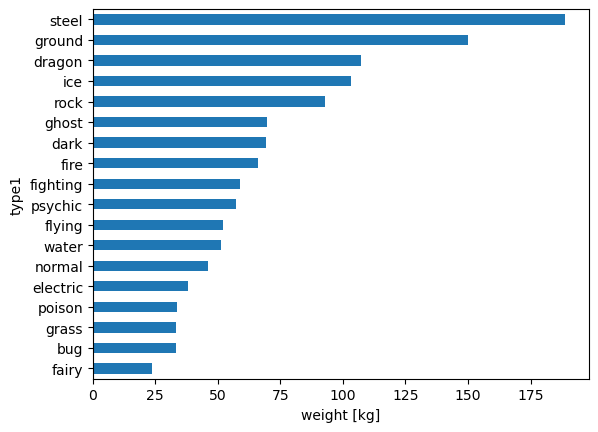

In [42]:
ax = data_selected.groupby("type1").mean(numeric_only=True)["weight_kg"].sort_values().plot.barh()
ax.set_xlabel("weight [kg]")

Bei Pandas werden solche Aufrufe schnell sehr lang und kompliziert, da  immer mehr und mehr Funktionen/Methoden hintereinander gehangen werden  können. Um es etwas übersichtlicher zu machen kann auch mit  Zwischenschritten gearbeitet werden!

Text(0.5, 0, 'weight [kg]')

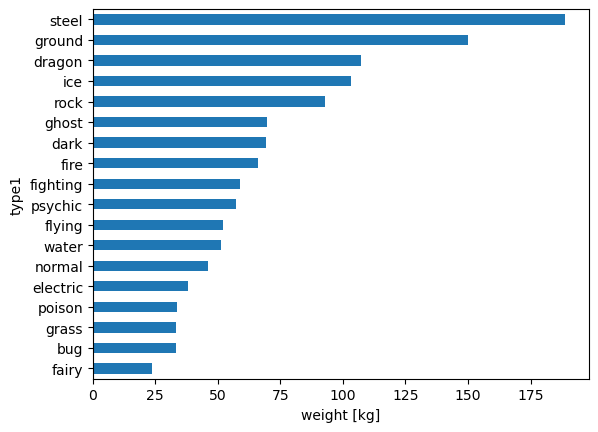

In [43]:
data_groupby_type = data_selected.groupby("type1")
data_mean_weight = data_groupby_type.mean(numeric_only=True)["weight_kg"]
ax = data_mean_weight.sort_values().plot.barh()
ax.set_xlabel("weight [kg]")

## Pandas ist riesig!

Zum Schluss noch der Hinweis, das wir in 2-3, ja auch nicht in 4-5 Vorlesung den Umfang von Pandas abdecken können. Es geht also v.a. darum, dass Sie sich mit dem Umgang mit Pandas und DataFrames vertraut machen und die einfachen Operationen damit ausführen können (z.B. slicing, Sortieren). Für alles weitere können Sie jederzeit in Foren oder auf der Pandas Dokumentation nachschauen, ob es für ihre spezielle Frage nicht schon eine passende Pandas-Methode gibt:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html